<a href="https://colab.research.google.com/github/mbrady4/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparing a Flag Dataset for Analysis

Building upon the example covered in the lecture, I spent some time to complete the cleaning and preparation of the flag dataset for analysis. The below example demonstrates an approach to importing a dataset without a header. Further, Pandas' "pd.set_option" is used to prevent the displayed table's columns from being truncated 

In [0]:
import pandas as pd

pd.set_option('display.max_columns', None)

flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
df = pd.read_csv(flag_data_url, header=None, names=['names','landmass','zone','area',
                                                    'population','lagnauge','religion','bars',
                                                    'stripes','colours','red','green','blue',
                                                    'gold','white','black','orange','mainhue',
                                                    'circles','crosses','saltires','quarters',
                                                    'sunstars','cresent','triangle','icon',
                                                    'animate','text','topleft','botright'])

df.head()

,names,landmass,zone,area,population,lagnauge,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,cresent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


This dataset contains no null values.

In [0]:
df.isnull().sum()

names         0
landmass      0
zone          0
area          0
population    0
lagnauge      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
cresent       0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

However, the dataset does contain several features of type string. In order to fully prepare this dataset for analysis, I will convert these features to be integer based with one hot encoding. Below, I verify that one hot encoding is feasible given the number of distinct strings contained within the feature (i.e. verified that one hot encoding will not create 100s of additional columns in the dataset). 

In [0]:
df['mainhue'].value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In the below statement, I use panda's "get_dummies" to one hot encode three string based features ('mainhue', 'topleft', 'botright')

In [0]:
df = pd.get_dummies(df, columns=['mainhue', 'topleft', 'botright'], prefix=['mainhue','tl','br'])
df.head()

,names,landmass,zone,area,population,lagnauge,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,cresent,triangle,icon,animate,text,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,tl_black,tl_blue,tl_gold,tl_green,tl_orange,tl_red,tl_white,br_black,br_blue,br_brown,br_gold,br_green,br_orange,br_red,br_white
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# 2. Building a Decision Tree to Predict Student's Chance of Admittance to University

Imported dataset from via file upload (originally foudn on Kaggle). 

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (1).csv


Included instructions for 'read_csv' to remove extra spacing from header names (sep='\s*,\s*'). This was necessary because the dataset's headers contained extra spaces which made accessing them extremely tedious/frustrating. 

In [0]:
import pandas as pd
df = pd.read_csv('Admission_Predict_Ver1.1.csv', sep='\s*,\s*', header=0, engine='python')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The dataset has no null values. 

In [0]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

All of the dataset's features are numeric which makes life easy! 

In [0]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

A quick verification that none of the columns has a blank value. 

In [0]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,6.770000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,1.460605
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,3.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,6.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,7.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,8.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,9.000000


This dataset naturally lends itself to attempting to model the probabiltiy that a given student will be accepted to the university they are applying to. In order, to increase the reliability of the model's prediction, in the below statements I reduce the specificity of the "Chance of Admit" column (rounded to nearest 10%; 10%, 20%, 30%, etc.)

In [0]:
df['Chance of Admit'] = df['Chance of Admit'] * 10
df['Chance of Admit'] = df['Chance of Admit'].astype(int)

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,9
1,2,324,107,4,4.0,4.5,8.87,1,7
2,3,316,104,3,3.0,3.5,8.00,1,7
3,4,322,110,3,3.5,2.5,8.67,1,8
4,5,314,103,2,2.0,3.0,8.21,0,6


Using the 'train_test_split' function, our dataset is divided into a training and test set. 

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=0)
train.shape, test.shape

((375, 9), (125, 9))

In [0]:
A Decision Tree model is constructed based on a number of features with the target column set to "Chance of Admit"

In [0]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
target = 'Chance of Admit'

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=4)
model.fit(train[features], train[target])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The below accuracy scores demonstrate that are model is somewhat predictive and that the dropoff between the Train and Test accuracy scores is reasonable (although not ideal). Note, to fine-tune the accuracy scores, I adjusted the included features and the max_depth of the decision tree. I found that a large max_depth resulted in over-fitting to the training data--and a very low test accuracy score. 

In [0]:
#Train Accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train Accuracy:', accuracy_score(y_true, y_pred))

#Test Accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test Accuracy:', accuracy_score(y_true, y_pred))

Train Accuracy: 0.6746666666666666
Test Accuracy: 0.6


Below is an interesting plot which shows the relative importance of each feature in the model. By far the most influential variable is a student's GPA (from prior instituations).

Text(0.5, 1.0, 'Decision Tree Feature Importances')

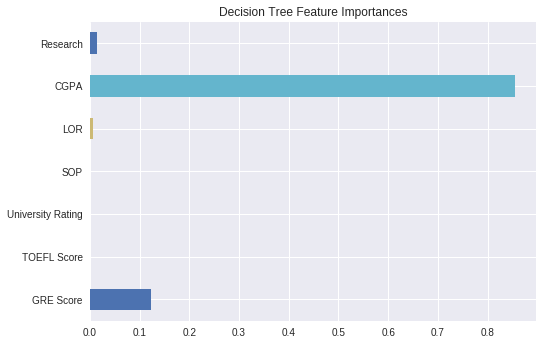

In [0]:
import matplotlib.pyplot as plt

pd.Series(model.feature_importances_, features).plot.barh()
plt.title('Decision Tree Feature Importances')

Finally, the decision tree model can be used to predict a hypothetical students chance of admittance to a specific university based on their educational background. 

In [0]:
import numpy as np

features = [[337, 118, 4, 4.5, 4.5, 9.65, 1]]
prediction = model.predict(np.asarray(features)) 
print('Predicted Rating: ' + str(prediction))

Predicted Rating: [9]


# 3. Cleaning a Real Estate Data Set

To get more intensive data cleaning practice, I used a toy real estate data set (source). The first step was uploading the file to colab. 

In [0]:
from google.colab import files
uploaded = files.upload()

Saving property data.txt to property data.txt


I then imported the dataset and reviewed it with ".head()". Note, a simpler way to approach data cleaning is to attempt to convert non-NaN null values to NaN (e.g., 'na', ''--'', 'n/a'). This can be done by adding the following to the 'read_csv' statement: 'na_values= 'na', '--',' n/a''

In [0]:
import pandas as pd

df = pd.read_csv('property data.txt')
df.head(15)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


As shown, there are a number of null values across the features. 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
PID             8 non-null float64
ST_NUM          7 non-null float64
ST_NAME         9 non-null object
OWN_OCCUPIED    8 non-null object
NUM_BEDROOMS    7 non-null object
NUM_BATH        8 non-null object
SQ_FT           8 non-null object
dtypes: float64(2), object(5)
memory usage: 584.0+ bytes


The below statements, use a mix of 'fillna', 'ffill', and 'replace' to swap null/inappropriate values for sensible values. 

In [0]:
df['NUM_BEDROOMS'] = df['NUM_BEDROOMS'].fillna(1)

In [0]:
df['NUM_BEDROOMS'] = df['NUM_BEDROOMS'].replace('na', 3)

In [0]:
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].replace('12', 'Y')
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].fillna('Y')

In [0]:
df['ST_NUM'] = df['ST_NUM'].ffill()
df['PID'] = df['PID'].ffill()

In [0]:
df['NUM_BATH'] = df['NUM_BATH'].replace('HURLEY', 1)
df['NUM_BATH'] = df['NUM_BATH'].fillna(1)

In [0]:
df['SQ_FT'] = df['SQ_FT'].replace('--', 1000)
df['SQ_FT'] = df['SQ_FT'].fillna(1000)

The final step in preparing this dataset is to convert the "ST_NAME" column to an int-based feature with one hot encoding. 

In [0]:
df = pd.get_dummies(df, columns=['ST_NAME'], prefix=['STREET'])

In [0]:
df.head(10)

,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,STREET_BERKELEY,STREET_LEXINGTON,STREET_PUTNAM,STREET_TREMONT,STREET_WASHINGTON
0,100001000.0,104.0,Y,3,1,1000,0,0,1,0,0
1,100002000.0,197.0,N,3,1.5,1000,0,1,0,0,0
2,100003000.0,197.0,N,1,1,850,0,1,0,0,0
3,100004000.0,201.0,Y,1,1,700,1,0,0,0,0
4,100004000.0,203.0,Y,3,2,1600,1,0,0,0,0
5,100006000.0,207.0,Y,1,1,800,1,0,0,0,0
6,100007000.0,207.0,Y,2,1,950,0,0,0,0,1
7,100008000.0,213.0,Y,1,1,1000,0,0,0,1,0
8,100009000.0,215.0,Y,3,2,1800,0,0,0,1,0


# 4. Preparing a Forest Fires Dataset For Analysis

To illustrate dataset importing and cleaning, I will work through the publically available Forest Fires dataset (hosted by UCI). This dataset contains information related to forest fires in the northeast region of Portugal. Our objective is to prepare the dataset for regression models which will aim to predict the burned area of forets firs, in northeast Portugal. 

In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


A quick check reveals that the dataset does not have any missing/null values. 

In [0]:
#Check to see if we are missing values

df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [0]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


For the most part the dataset is composed of features that are either ints or floats. In the next set of activities, I will convert the two object features (month, day) into model-interpretable features with one-hot encoding. 

In [0]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

One hot encoding, uses Pandas' "get_dummies" function to create a new column in the dataframe for each unique value within the original feature's column. For example, "get_dummies" converts the "month" column into 12 distinct columns (1 per month). Each row within each column is designated as either 0 (False) or 1 (True). One important detail to remeber is that the "get_dummies" function returns a modified dataframe.  

In [0]:
df = pd.get_dummies(df, columns=['month'])

df.head()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,0,1,0,0,0,0
1,7,4,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,0,1,0
2,7,4,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,0,1,0
3,8,6,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,0,1,0,0,0,0
4,8,6,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,0,1,0,0,0,0


In [0]:
pd.get_dummies(df, columns=['day']).head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


# Key Learnings



**1.   Utilize the power of read_csv:** There are many powerful options beyond just importing the URL (e.g., header, space separation)

**2.   Leverage one hot encoding as practical: ** While it creates additional columns, it also prevents inappropriate conclusions from being drawn regarding numeric weighting. 

**3.   Reducing target specificity can improve model accuracy: **As demonstrated in the graduate admissions example, by creating larger bins within our target examples increases the predictive ability of a model. 



